# Analyse defects calculations with pynter

This example shows the analysis that can be performed starting from a `DefectsAnalysis` object, which contains all the information that is needed from the defect calculations. Check the other notebooks for the examples on how to create this object from the DFT data. For more details regarding the methods refer to the notebook on vacancies analysis.

In [1]:
from pynter.defects.entries import SingleDefectEntry , get_defect_entry_from_jobs
from pynter.defects.analysis import DefectsAnalysis
from pynter.phase_diagram.analysis import Reservoirs, PDHandler
from pynter.tools.structure import view_structure_with_ase
from pynter.tools.utils import save_object_as_json, get_object_from_json
from pymatgen.electronic_structure.dos import FermiDos
from pynter.defects.thermodynamics import PartialPressureAnalysis
from pynter.defects.plotter import PartialPressurePlotter
from pymatgen.core.composition import Composition
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.analysis.defects.utils import kb

### Import DefectsAnalysis object

The object in this example contains the data for vacancies, substitutions and defect complexes for NaNbO3. Starting from the complete set it is possible to create other `DefectsAnalysis` objects with filtered defect entries to limit the dataset and focus on particular defect species.

In [2]:
da_all = get_object_from_json(DefectsAnalysis,'./data/NN_Pbcm_DA_all-defects.json')

### Visualize the defect entries with pandas

In [3]:
da_all.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Sub_Ca_on_Na-Vac_Na_mult32,$Ca_{Na}$-$V_{Na}$,"{Na: -2.0, Ca: 1.0}",-1,32
Sub_Ca_on_Na-Vac_Na_mult32,$Ca_{Na}$-$V_{Na}$,"{Na: -2.0, Ca: 1.0}",0,32
Sub_Ca_on_Na-Vac_Na_mult32,$Ca_{Na}$-$V_{Na}$,"{Na: -2.0, Ca: 1.0}",1,32
Sub_Ca_on_Na_mult32,$Ca_{Na}$,"{Na: -1.0, Ca: 1.0}",0,32
Sub_Ca_on_Na_mult32,$Ca_{Na}$,"{Na: -1.0, Ca: 1.0}",1,32
Sub_Ca_on_Na_mult32,$Ca_{Na}$,"{Na: -1.0, Ca: 1.0}",2,32
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",0,192
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",1,192
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",2,192


In [4]:
res_all = get_object_from_json(Reservoirs,'./data/reservoirs_boundary_NN_Pbcm_PBE_dopand_poor.json')
res_all.get_dataframe()

,O,Nb,Na,Sn,Sr,Ca
A,-8.886032,-11.004249,-2.806536,-8.182465,-7.482171,-7.917296
B,-9.007432,-11.176406,-2.270180,-8.182465,-7.482171,-7.917296
C,-4.947955,-20.823385,-4.801630,-8.182465,-7.482171,-7.917296
D,-4.947955,-21.325097,-4.299918,-8.182465,-7.482171,-7.917296


In [5]:
dos = get_object_from_json(FermiDos,'./data/NN_Pbcm_pure_fermi_dos.json')

### Plot formation energies and charge transition levels

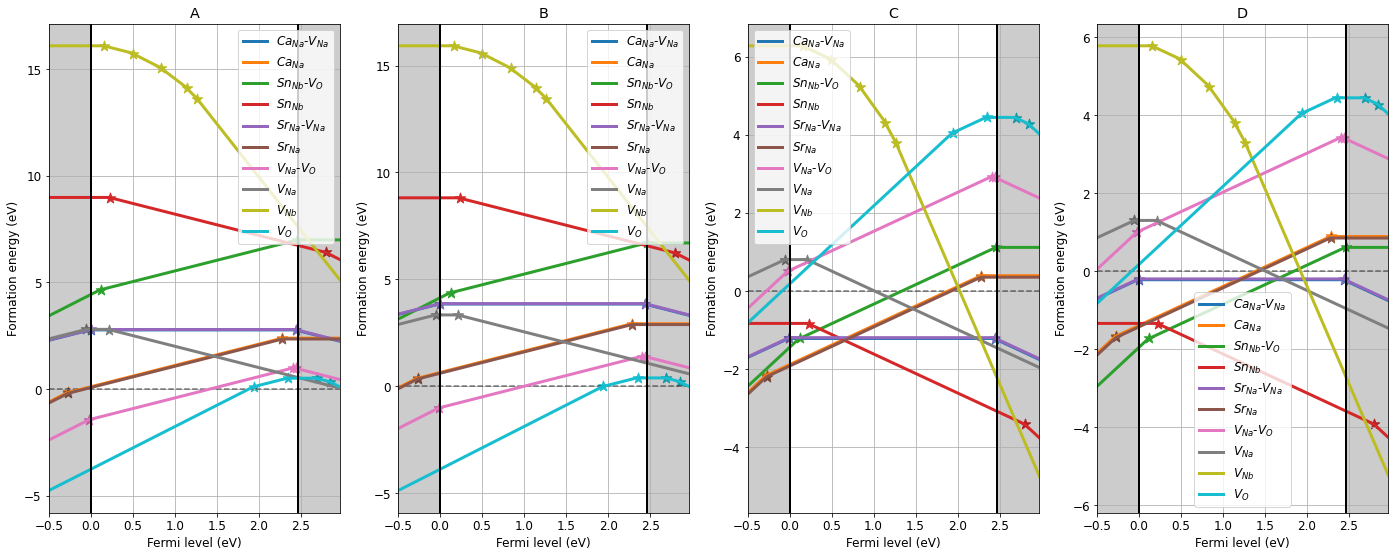

In [6]:
i = 0
for r,mu in res_all.items():
    i += 1
    da_all.plot(mu,get_subplot=True,subplot_settings=[1,4,i],title=r,plotsize=(3,1.5))

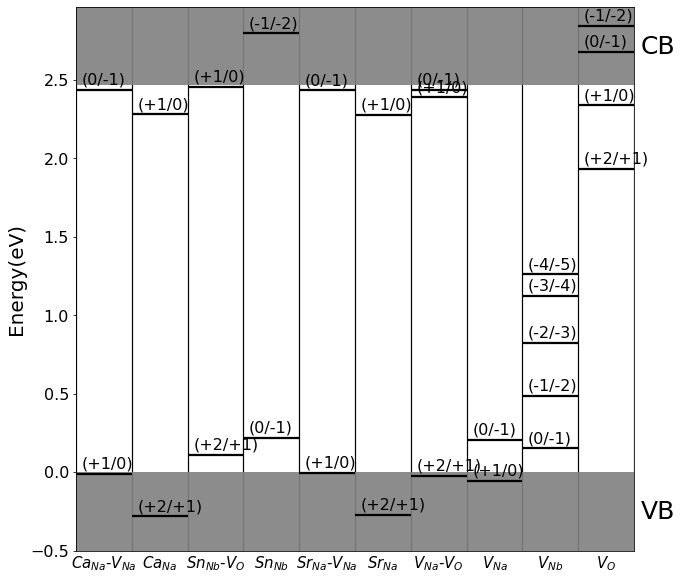

In [7]:
da_all.plot_ctl();

### Plot binding energies

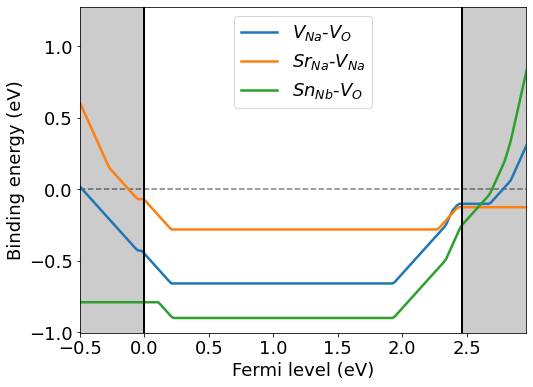

In [8]:
names = ['Vac_Na-Vac_O_mult256','Sub_Sr_on_Na-Vac_Na_mult32','Sub_Sn_on_Nb-Vac_O_mult192']
da_all.plot_binding_energies(names);

## Analysis of SrSnO3-doped NaNbO3

In [9]:
da = da_all.filter_entries(elements=['Sr','Sn'])
da.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",0,192
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",1,192
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",2,192
Sub_Sn_on_Nb_mult32,$Sn_{Nb}$,"{Nb: -1.0, Sn: 1.0}",-1,32
Sub_Sn_on_Nb_mult32,$Sn_{Nb}$,"{Nb: -1.0, Sn: 1.0}",-2,32
Sub_Sn_on_Nb_mult32,$Sn_{Nb}$,"{Nb: -1.0, Sn: 1.0}",0,32
Sub_Sr_on_Na-Vac_Na_mult32,$Sr_{Na}$-$V_{Na}$,"{Na: -2.0, Sr: 1.0}",-1,32
Sub_Sr_on_Na-Vac_Na_mult32,$Sr_{Na}$-$V_{Na}$,"{Na: -2.0, Sr: 1.0}",0,32
Sub_Sr_on_Na-Vac_Na_mult32,$Sr_{Na}$-$V_{Na}$,"{Na: -2.0, Sr: 1.0}",1,32


In [10]:
res = res_all.filter_reservoirs(elements=['Na','Nb','O','Sr','Sn'])
res

          O         Nb        Na        Sn        Sr
A -8.886032 -11.004249 -2.806536 -8.182465 -7.482171
B -9.007432 -11.176406 -2.270180 -8.182465 -7.482171
C -4.947955 -20.823385 -4.801630 -8.182465 -7.482171
D -4.947955 -21.325097 -4.299918 -8.182465 -7.482171

## Partial Pressure Analysis with fixed extrinsic defects concentrations

In [11]:
frozen = {'Sub_Sr_on_Na':1e20,'Sub_Sn_on_Nb':1e20}
extrinsic_chempots = {}
for el in res['A']:
    if el.symbol == 'Sr' or el.symbol == 'Sn':
        extrinsic_chempots[el] = res['A'][el]

In [12]:
comp = Composition('NaNbO3')
panalysis = PartialPressureAnalysis(defects_analysis=da,phase_diagram=res.phase_diagram,target_comp=comp,
                                    bulk_dos=dos,temperature=1000,frozen_defect_concentrations=frozen,
                                    extrinsic_chempots=extrinsic_chempots)

### Calculate concentrations and Fermi levels

In [14]:
p,dc,cc,mue = panalysis.get_concentrations(
            pressure_range=(-20,10),concentrations_output='total',npoints=20,get_fermi_levels=True)

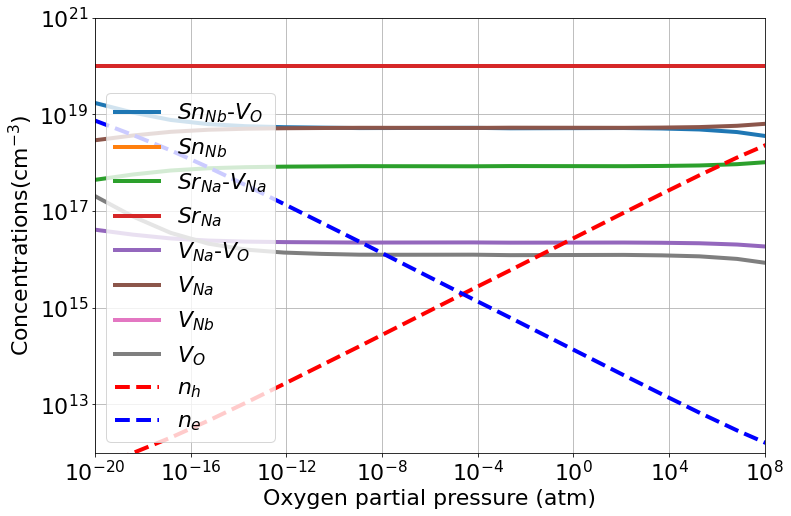

In [15]:
plotter = PartialPressurePlotter()
plotter.plot_concentrations(p,dc,cc,concentrations_output='total',ylim =(1e12,1e21));

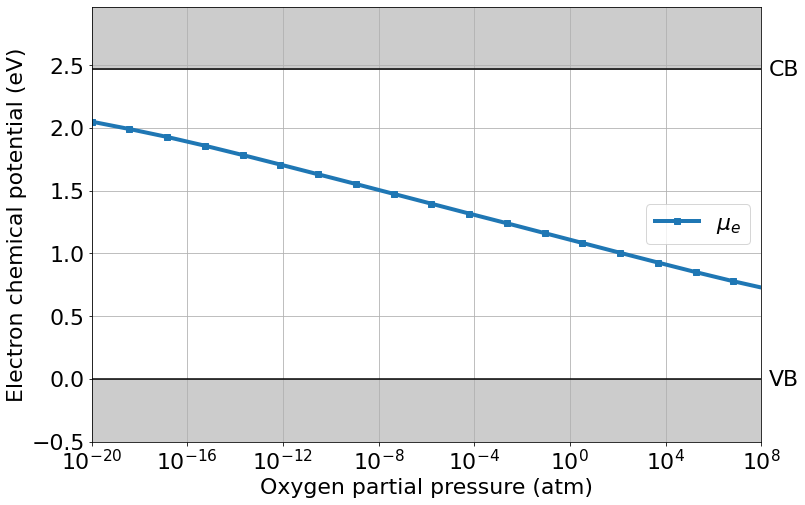

In [17]:
plotter.plot_fermi_level(p,mue,da.band_gap);

### Fixed dopand concentrations and quenched defects

In [20]:
pq,mueq = panalysis.get_quenched_fermi_levels(1000,300,npoints=20)

/home/lorenzo/pynter/pynter/defects/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


In [21]:
fermi_levels={'equilibrium':mue,'quenched':mueq}

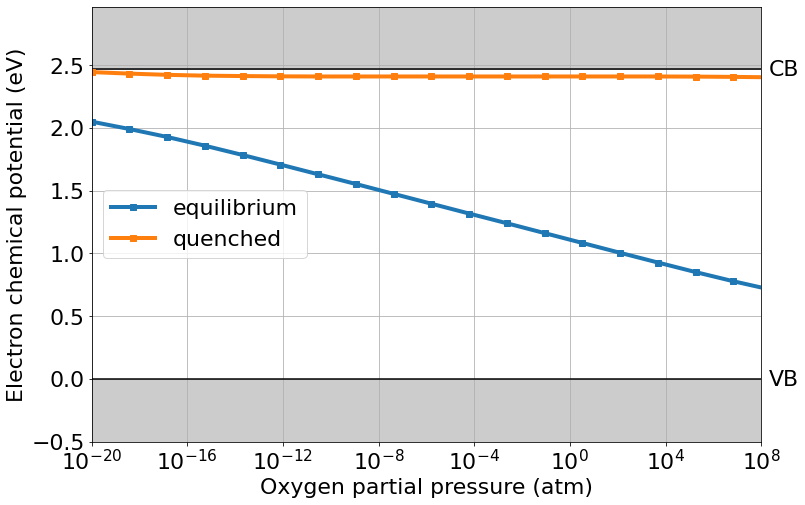

In [23]:
plotter.plot_fermi_level(p,fermi_levels,da.band_gap);